In [ ]:
# Copy it and run in Terminal to download the packages needed.
pip install rethinkdb pandas matplotlib seaborn numpy plotly wordcloud scikit-learn

In [1]:
from rethinkdb import RethinkDB
r = RethinkDB()

In [6]:
# Not the first time: Connect to RethinkDB
conn = r.connect(host='172.17.0.3', port=28015, db='test')

In [2]:
# Fist time run: Creat a table
r.connect( "172.17.0.3", 28015).repl()
r.db("test").table_create("movies").run()

{'config_changes': [{'new_val': {'db': 'test',
    'durability': 'hard',
    'id': '112556a2-6bc6-4c48-83db-07a8ca7cd740',
    'indexes': [],
    'name': 'movies',
    'primary_key': 'id',
    'shards': [{'nonvoting_replicas': [],
      'primary_replica': 'f5d0e45c34cf_3xg',
      'replicas': ['f5d0e45c34cf_3xg']}],
    'write_acks': 'majority',
    'write_hook': None},
   'old_val': None}],
 'tables_created': 1}

In [3]:
# Import data into database
csv_file = '/home/jovyan/movies.csv'
with open(csv_file, 'r') as file:
    headers = file.readline().strip().split(',')

    for line in file:  
        data = line.strip().split(',')
        document = dict(zip(headers, data))
        r.table('movies').insert(document).run()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from wordcloud import WordCloud

In [7]:
df_list = []
cursor = r.table("movies").run(conn)
for document in cursor:
    df_row = pd.DataFrame([document])
    # print(document)
    df_list.append(df_row)
df = pd.concat(df_list, ignore_index=True)
print(df)

     actor_1_facebook_likes        actor_1_name actor_2_facebook_likes  \
0                       530  Miranda Richardson                    387   
1                       145    Kathleen Freeman                     50   
2                       986         Matt Frewer                    918   
3                       982           John Amos                    602   
4                       735          Anna Friel                    627   
...                     ...                 ...                    ...   
5037                    975         Alicia Witt                    345   
5038                    851  Jada Pinkett Smith                    680   
5039                    797  Eva Amurri Martino                    474   
5040                    878       Monica Potter                    834   
5041                   2000     Kelly Macdonald                   1000   

            actor_2_name actor_3_facebook_likes       actor_3_name  \
0           John Neville                 

In [5]:
df.head()

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,color,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,200,Glen Hansard,96,Markéta Irglová,18,Darren Healy,1.85,180000,332,Color,...,7.9,English,26000,http://www.imdb.com/title/tt0907657/?ref_=fn_t...,Once,232,329,90827,immigrant|independent film|song|street|vacuum ...,2007
1,726,Richard Burton,422,Jean Simmons,275,Victor Mature,2.2,5000000,1920,Color,...,6.8,English,0,http://www.imdb.com/title/tt0046247/?ref_=fn_t...,The Robe,42,69,6359,box office hit|crucifixion|nightmare|palestine...,1953
2,1000,Jason Flemyng,872,Max Ryan,845,Tony Curran,2.35,78000000,4714,Black and White,...,5.8,English,0,http://www.imdb.com/title/tt0311429/?ref_=fn_t...,The League of Extraordinary Gentlemen,202,786,141533,box office flop|captain nemo|dorian gray|invis...,2003
3,559,Bob Balaban,481,Teri Garr,252,Melinda Dillon,2.35,19400870,1591,Color,...,7.7,English,0,http://www.imdb.com/title/tt0075860/?ref_=fn_t...,Close Encounters of the Third Kind,171,339,139288,alien|close encounter of the third kind|mother...,1977
4,231,Neil Hopkins,27,Darren Keefe Reiher,19,David Douglas,1.78,3000000,313,Color,...,3.3,English,48,http://www.imdb.com/title/tt0385890/?ref_=fn_t...,My Big Fat Independent Movie,14,24,1257,independent film|spoof,2005


In [8]:
df = df.drop(columns=['facenumber_in_poster'])

In [9]:
df.replace(['0'], np.nan, inplace=True)

In [8]:
df.isnull().sum()

actor_1_facebook_likes         33
actor_1_name                    7
actor_2_facebook_likes         69
actor_2_name                   13
actor_3_facebook_likes        111
actor_3_name                   21
aspect_ratio                  319
budget                        485
cast_total_facebook_likes      32
color                          18
content_rating                297
country                         4
director_facebook_likes      1011
director_name                 104
duration                       14
genres                          0
gross                         883
id                              0
imdb_score                      4
language                       12
movie_facebook_likes         2160
movie_imdb_link                 8
movie_title                     0
num_critic_for_reviews         49
num_user_for_reviews           19
num_voted_users                 0
plot_keywords                 176
title_year                    115
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   actor_1_facebook_likes     5009 non-null   object
 1   actor_1_name               5035 non-null   object
 2   actor_2_facebook_likes     4973 non-null   object
 3   actor_2_name               5029 non-null   object
 4   actor_3_facebook_likes     4931 non-null   object
 5   actor_3_name               5021 non-null   object
 6   aspect_ratio               4723 non-null   object
 7   budget                     4557 non-null   object
 8   cast_total_facebook_likes  5010 non-null   object
 9   color                      5024 non-null   object
 10  content_rating             4745 non-null   object
 11  country                    5038 non-null   object
 12  director_facebook_likes    4031 non-null   object
 13  director_name              4938 non-null   object
 14  duration

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

actor_1_facebook_likes        877
actor_1_name                 2096
actor_2_facebook_likes        946
actor_2_name                 3031
actor_3_facebook_likes        905
actor_3_name                 3548
aspect_ratio                   67
budget                        448
cast_total_facebook_likes    3991
color                           2
content_rating                 34
country                        80
director_facebook_likes       434
director_name                2397
duration                      191
genres                        914
gross                        4035
id                           5042
imdb_score                    134
language                      107
movie_facebook_likes          883
movie_imdb_link              4910
movie_title                  4910
num_critic_for_reviews        528
num_user_for_reviews         1013
num_voted_users              4829
plot_keywords                4711
title_year                    134
dtype: int64

In [10]:
df['actor_2_facebook_likes'] = pd.to_numeric(df['actor_2_facebook_likes'], errors='coerce')
df['actor_1_facebook_likes'] = pd.to_numeric(df['actor_1_facebook_likes'], errors='coerce')
df['actor_3_facebook_likes'] = pd.to_numeric(df['actor_3_facebook_likes'], errors='coerce')
df['aspect_ratio'] = pd.to_numeric(df['aspect_ratio'], errors='coerce')
df['cast_total_facebook_likes'] = pd.to_numeric(df['cast_total_facebook_likes'], errors='coerce')
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['movie_facebook_likes'] = pd.to_numeric(df['movie_facebook_likes'], errors='coerce')
df['num_critic_for_reviews'] = pd.to_numeric(df['num_critic_for_reviews'], errors='coerce')
df['num_user_for_reviews'] = pd.to_numeric(df['num_user_for_reviews'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['num_voted_users'] = pd.to_numeric(df['num_voted_users'], errors='coerce')
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['director_facebook_likes'] = pd.to_numeric(df['director_facebook_likes'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_1_facebook_likes     5009 non-null   float64
 1   actor_1_name               5035 non-null   object 
 2   actor_2_facebook_likes     4971 non-null   float64
 3   actor_2_name               5029 non-null   object 
 4   actor_3_facebook_likes     4931 non-null   float64
 5   actor_3_name               5021 non-null   object 
 6   aspect_ratio               4723 non-null   float64
 7   budget                     4494 non-null   float64
 8   cast_total_facebook_likes  5002 non-null   float64
 9   color                      5024 non-null   object 
 10  content_rating             4745 non-null   object 
 11  country                    5038 non-null   object 
 12  director_facebook_likes    4031 non-null   float64
 13  director_name              4938 non-null   objec

In [14]:
df.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
count,5009.000000,4.971000e+03,4931.000000,4723.000000,4.494000e+03,5002.000000,4031.000000,5028.000000,4.159000e+03,5.038000e+03,2882.000000,4993.000000,4957.000000,4.973000e+03,4.920000e+03
mean,6595.381513,1.400263e+04,656.651592,6.571918,3.998652e+07,10561.014594,841.115852,107.201074,4.846841e+07,7.440881e+03,13071.397481,140.194272,273.530765,8.384246e+04,2.288313e+05
std,15053.461430,7.233617e+05,1677.726599,222.223193,2.073754e+08,23776.570934,3093.226556,25.197441,6.845299e+07,4.160950e+05,24067.753710,121.601675,378.730862,1.386864e+05,4.090814e+06
min,2.000000,2.000000e+00,2.000000,1.180000,2.180000e+02,2.000000,2.000000,7.000000,1.620000e+02,1.600000e+00,1.330000,1.000000,1.000000,5.000000e+00,1.916000e+03
25%,623.000000,3.000000e+02,144.000000,1.850000,6.000000e+06,1455.250000,23.000000,93.000000,5.340988e+06,5.800000e+00,373.250000,50.000000,65.000000,8.692000e+03,1.999000e+03
50%,989.000000,6.170000e+02,383.000000,2.350000,2.000000e+07,3145.000000,82.000000,103.000000,2.551750e+07,6.600000e+00,992.500000,110.000000,157.000000,3.452000e+04,2.005000e+03
75%,11000.000000,9.340000e+02,638.000000,2.350000,4.500000e+07,14155.750000,272.000000,118.000000,6.230944e+07,7.200000e+00,16000.000000,195.000000,327.000000,9.648000e+04,2.011000e+03
max,640000.000000,5.000000e+07,23000.000000,15000.000000,1.221550e+10,656730.000000,23000.000000,511.000000,7.605058e+08,2.800000e+07,349000.000000,813.000000,5060.000000,1.689764e+06,1.800000e+08


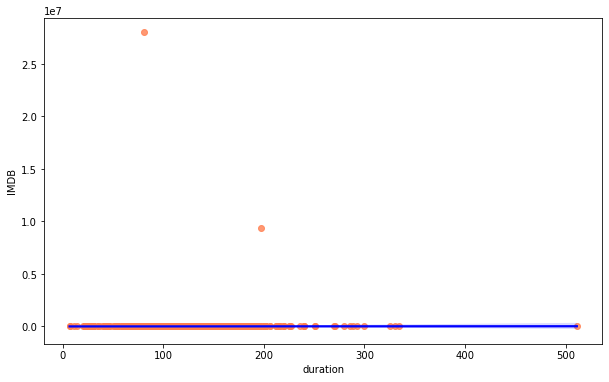

In [15]:
# duration v/s imdb
plt.figure(figsize=(10,6))
sns.regplot(data=df ,x='duration', y='imdb_score', scatter_kws={'color': 'coral'}, line_kws={'color': 'blue'})
plt.xlabel('duration')
plt.ylabel('IMDB')
plt.show()
# The plot shows the presence of outliers in IMDB.

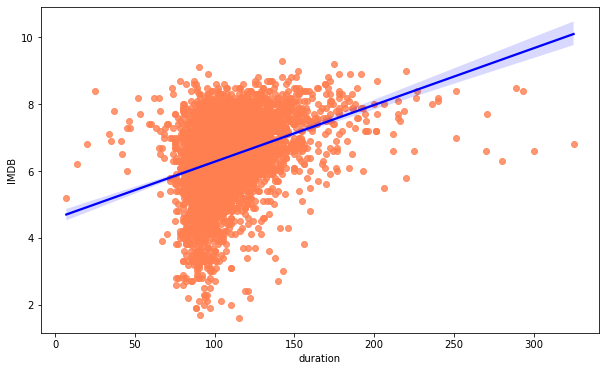

In [24]:
# Remove the outliers.
df = df[df['imdb_score'] <= 10]
plt.figure(figsize=(10,6))
sns.regplot(data=df ,x='duration', y='imdb_score', scatter_kws={'color': 'coral'}, line_kws={'color': 'blue'})
plt.xlabel('duration')
plt.ylabel('IMDB')
plt.ticklabel_format(style='plain')
plt.show()
# Movie duration are mostly concentrated in the 100-150min range, 
# with IMDB scores likely to increase as timings increase.

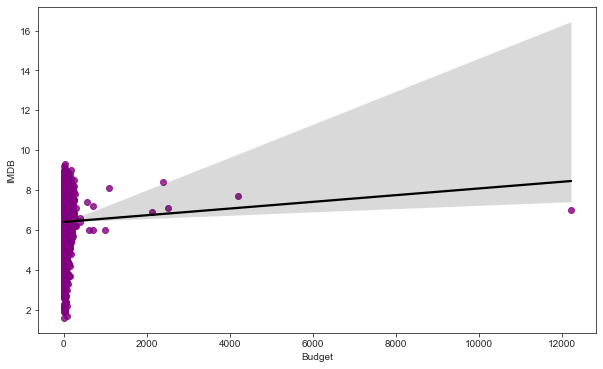

In [26]:
#budget v/s imdb
sns.set_style('ticks')
plt.figure(figsize=(10,6))
s = df['budget']/1000000
sns.regplot(data=df ,x=s, y='imdb_score', scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.xlabel('Budget')
plt.ylabel('IMDB')
plt.show()
# The plot shows the presence of outliers in budget.

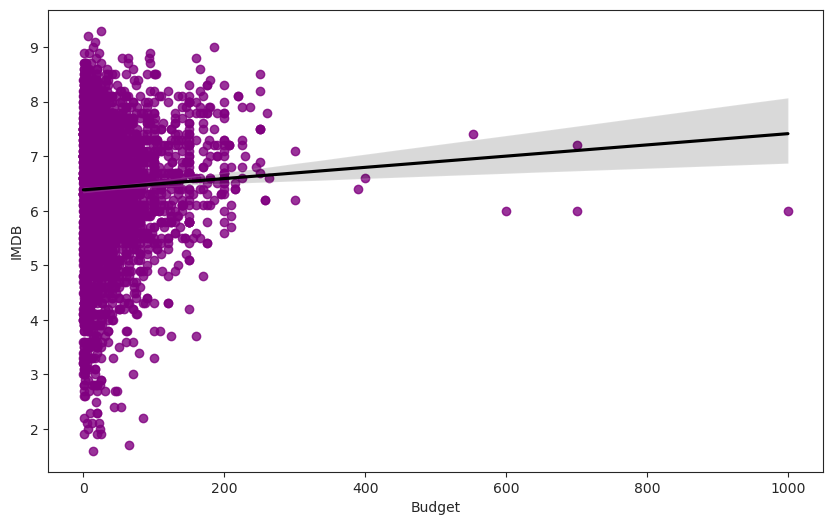

In [13]:
# Remove the outliers.
df = df[df['budget'] <= 1000000000]
sns.set_style('ticks')
plt.figure(figsize=(10,6))
s = df['budget']/1000000
sns.regplot(data=df ,x=s, y='imdb_score', scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.xlabel('Budget')
plt.ylabel('IMDB')
plt.show()
# Budgets are mostly under 200 and are positively correlated with IMDB scores.

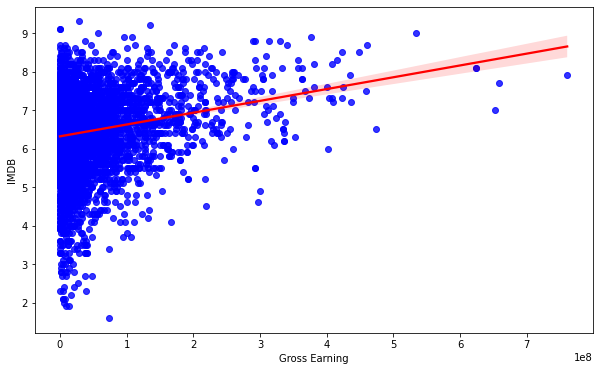

In [35]:
# gross earning vs imdb
plt.figure(figsize=(10,6))
sns.regplot(data=df ,x='gross', y='imdb_score', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Gross Earning')
plt.ylabel('IMDB')
plt.show()
# Gross is positively correlated with IMDB scores.

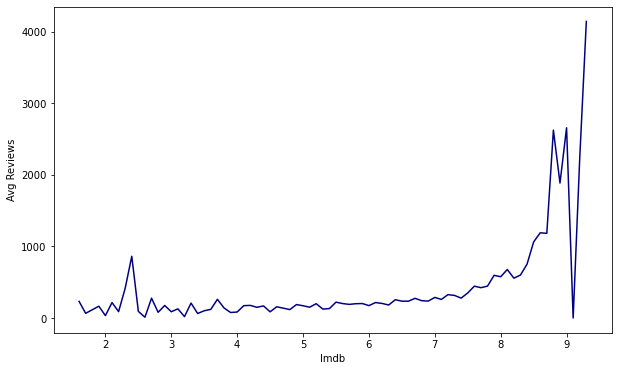

In [25]:
# average reviews by imdb
plt.figure(figsize=(10,6))
avg_reviews = df.groupby('imdb_score')['num_user_for_reviews'].mean().reset_index()
sns.lineplot(data=avg_reviews, x='imdb_score', y='num_user_for_reviews', color='navy')
plt.xlabel('Imdb')
plt.ylabel('Avg Reviews')
plt.show()
# Highly scored movies have more reviews.

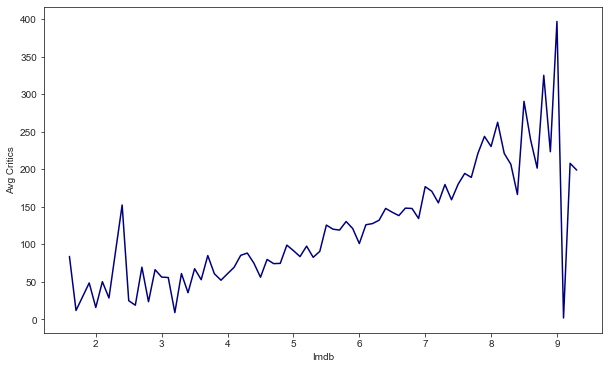

In [27]:
# average critics by imdb
plt.figure(figsize=(10,6))
avg_reviews = df.groupby('imdb_score')['num_critic_for_reviews'].mean().reset_index()
sns.lineplot(data=avg_reviews, x='imdb_score', y='num_critic_for_reviews', color='navy')
plt.xlabel('Imdb')
plt.ylabel('Avg Critics')
plt.show()
# Average Critics is positively correlated with IMDB scores.

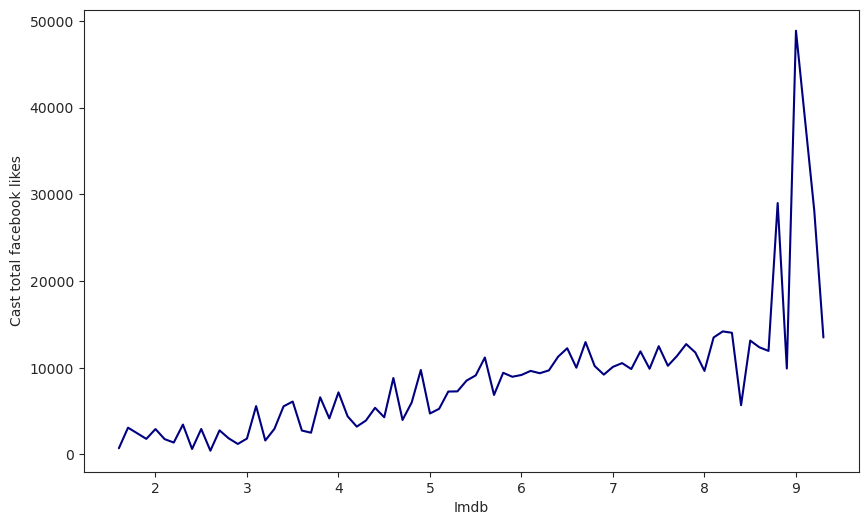

In [15]:
df = df[df['cast_total_facebook_likes'] <= 100000]
plt.figure(figsize=(10,6))
avg_reviews = df.groupby('imdb_score')['cast_total_facebook_likes'].mean().reset_index()
sns.lineplot(data=avg_reviews, x='imdb_score', y='cast_total_facebook_likes', color='navy')
plt.xlabel('Imdb')
plt.ylabel('Cast total facebook likes')
plt.show()
# Cast total facebook likes is positively correlated with IMDB scores.

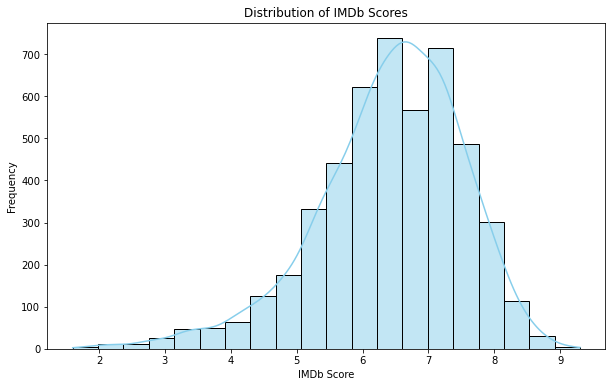

In [54]:
# Visualize the distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()
# The IMDB scores are concentrated in the 6-8 range, with a similar normal distribution

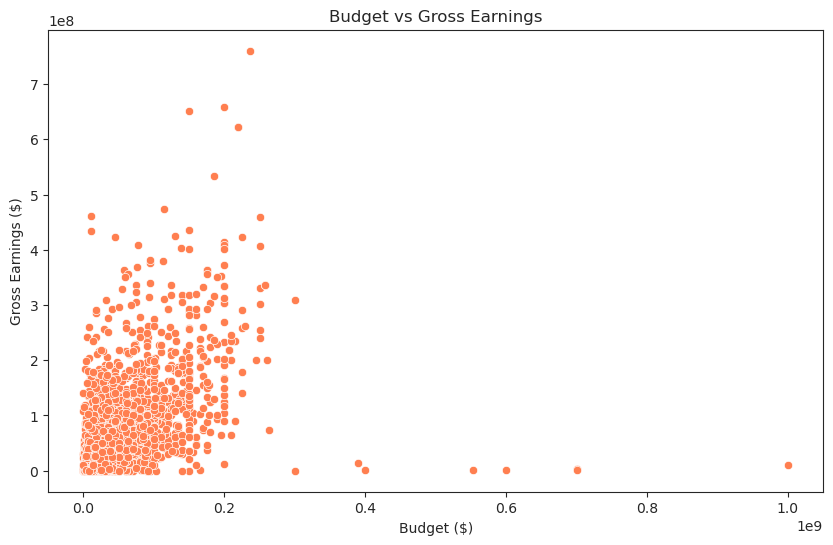

In [16]:
# Visualize the relationship between budget and gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='gross', data=df, color='coral')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Earnings ($)')
plt.show()

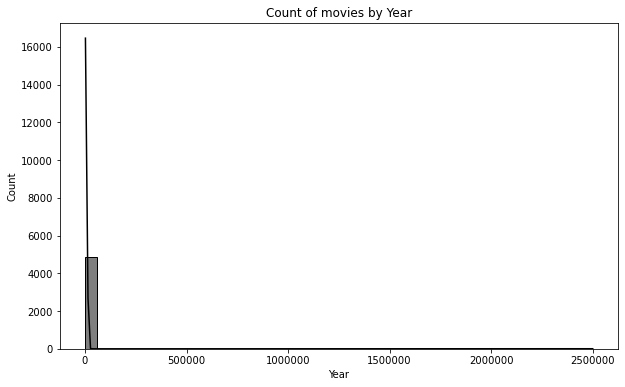

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='title_year', bins=45, kde=True, color='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of movies by Year')
plt.ticklabel_format(style='plain')
plt.show()
# The plot shows the presence of outliers in year.

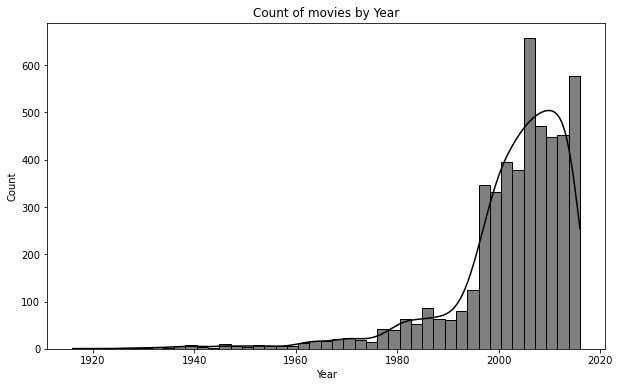

In [17]:
# Remove the outliers
df = df[df['title_year'] <= 2023]
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='title_year', bins=45, kde=True, color='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of movies by Year')
plt.ticklabel_format(style='plain')
plt.show()

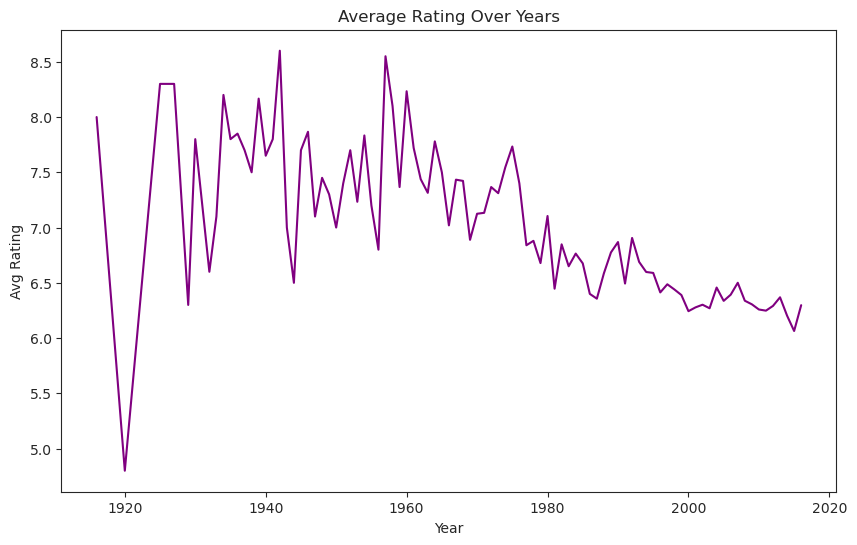

In [17]:
# lets find out avg imdb rating by year
plt.figure(figsize=(10,6))
avg_imdb = df.groupby('title_year')['imdb_score'].mean().reset_index()
sns.lineplot(data=avg_imdb, x='title_year', y='imdb_score', color='purple')
plt.xlabel('Year')
plt.ylabel('Avg Rating')
plt.title('Average Rating Over Years')
plt.show()
# Ratings fluctuated widely over time, but generally trended downward.

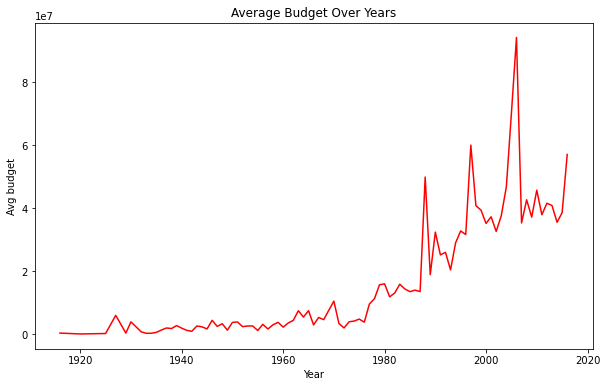

In [42]:
# lets find out avg budget rating by year
plt.figure(figsize=(10,6))
avg_imdb = df.groupby('title_year')['budget'].mean().reset_index()
sns.lineplot(data=avg_imdb, x='title_year', y='budget', color='red')
plt.xlabel('Year')
plt.ylabel('Avg budget')
plt.title('Average Budget Over Years')
plt.show()
# Budget fluctuated widely over time, but generally trended upward.

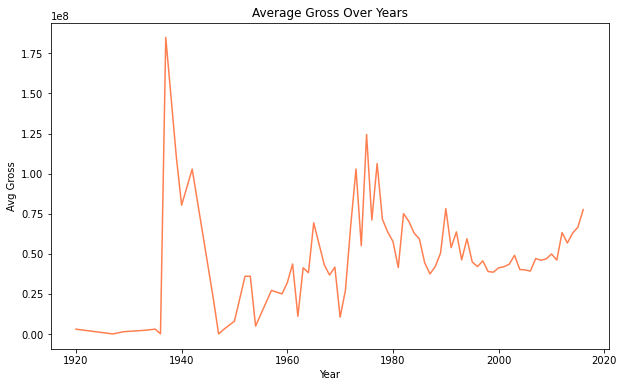

In [43]:
# lets find out avg gross by year
plt.figure(figsize=(10,6))
avg_imdb = df.groupby('title_year')['gross'].mean().reset_index()
sns.lineplot(data=avg_imdb, x='title_year', y='gross', color='coral')
plt.xlabel('Year')
plt.ylabel('Avg Gross')
plt.title('Average Gross Over Years')
plt.show()
# There is no significant relationship between gross and year.

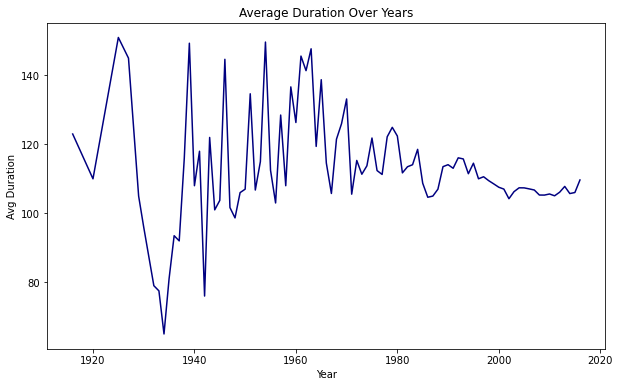

In [44]:
# lets find out avg duration rating by year
plt.figure(figsize=(10,6))
avg_imdb = df.groupby('title_year')['duration'].mean().reset_index()
sns.lineplot(data=avg_imdb, x='title_year', y='duration', color='navy')
plt.xlabel('Year')
plt.ylabel('Avg Duration')
plt.title('Average Duration Over Years')
plt.show()
# There is no significant relationship between duration and year.

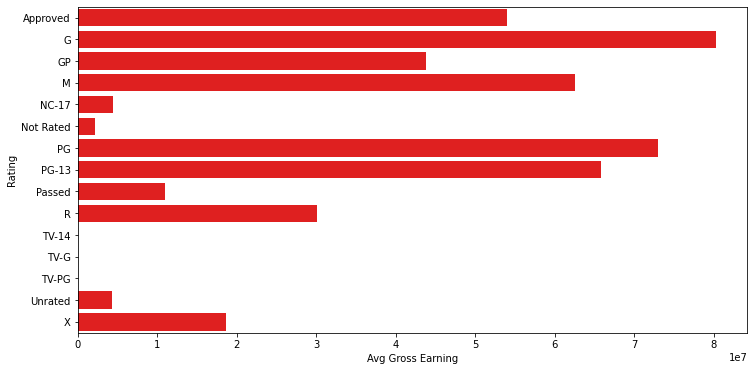

In [46]:
# content rating by gross
plt.figure(figsize=(12,6))
avg_earn1 = df.groupby('content_rating')['gross'].mean().reset_index()
sns.barplot(data=avg_earn1, y='content_rating', x='gross', color='red')
plt.xlabel('Avg Gross Earning')
plt.ylabel('Rating')
plt.show()
# Content ratings have a large impact on gross earning.

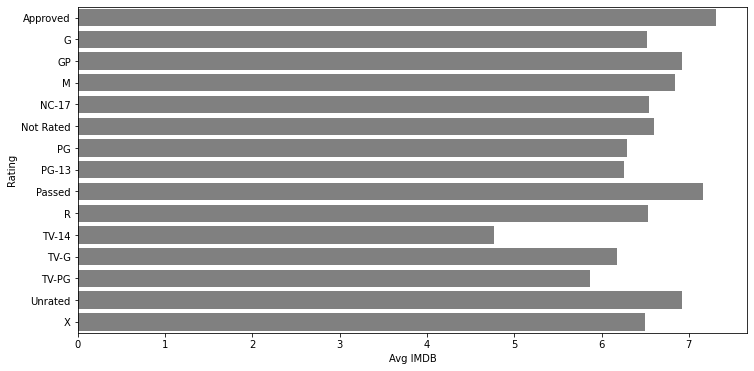

In [47]:
# content rating by imdb
plt.figure(figsize=(12,6))
avg_earn1 = df.groupby('content_rating')['imdb_score'].mean().reset_index()
sns.barplot(data=avg_earn1, y='content_rating', x='imdb_score', color='grey')
plt.xlabel('Avg IMDB')
plt.ylabel('Rating')
plt.show()
# Content ratings have a signifaicant impact on IMDB.

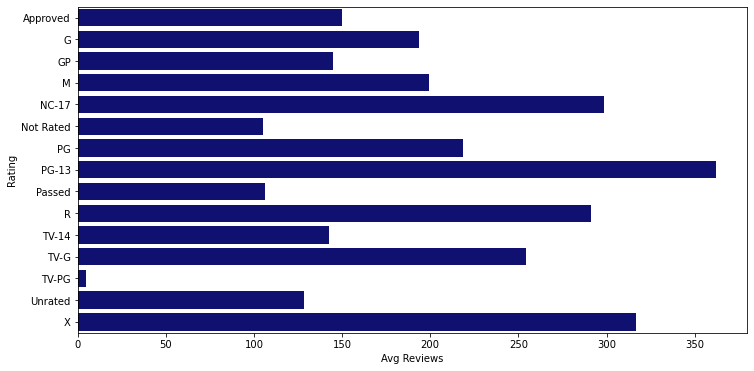

In [48]:
# content rating by reviews
plt.figure(figsize=(12,6))
avg_earn1 = df.groupby('content_rating')['num_user_for_reviews'].mean().reset_index()
sns.barplot(data=avg_earn1, y='content_rating', x='num_user_for_reviews', color='navy')
plt.xlabel('Avg Reviews')
plt.ylabel('Rating')
plt.show()
# Content ratings have a large impact on reviews.

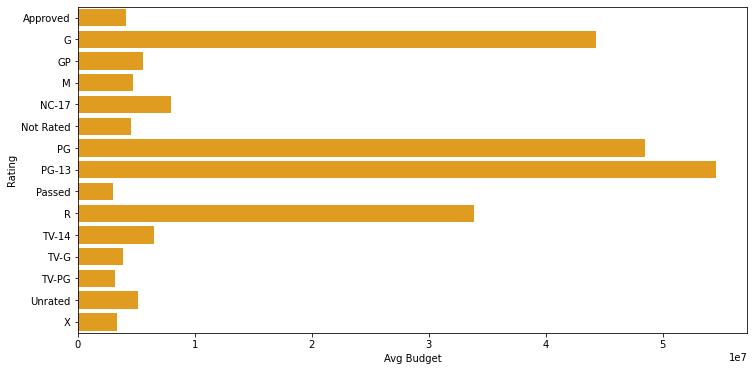

In [49]:
# content rating by budget
plt.figure(figsize=(12,6))
avg_earn1 = df.groupby('content_rating')['budget'].mean().reset_index()
sns.barplot(data=avg_earn1, y='content_rating', x='budget', color='orange')
plt.xlabel('Avg Budget')
plt.ylabel('Rating')
plt.show()
# Content ratings have a large impact on budget.

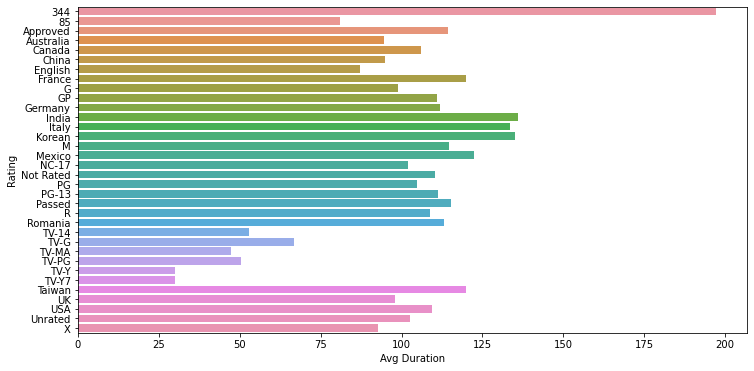

In [31]:
plt.figure(figsize=(12,6))
avg_earn1 = df.groupby('content_rating')['duration'].mean().reset_index()
sns.barplot(data=avg_earn1, y='content_rating', x='duration')
plt.xlabel('Avg Duration')
plt.ylabel('Rating')
plt.show()

<AxesSubplot:>

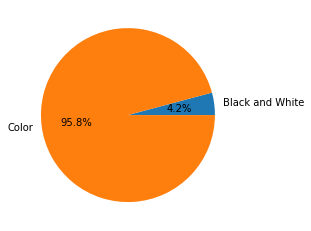

In [33]:
df.groupby('color').size().plot(kind='pie', autopct='%.1f%%')

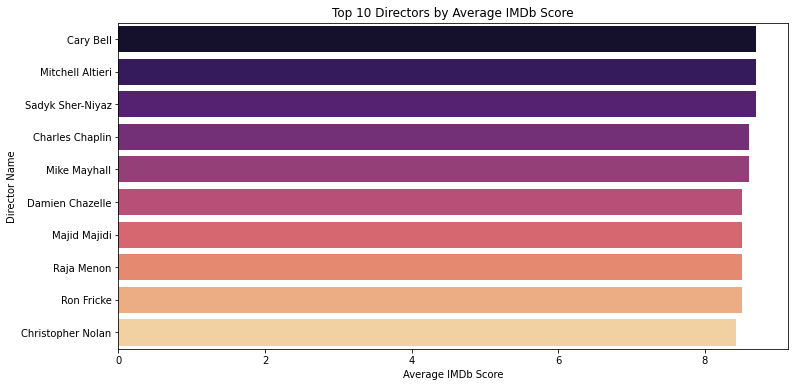

In [52]:
# Visualize the top 10 directors with the highest average IMDb scores
top_directors = df.groupby('director_name')['imdb_score'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Director Name')
plt.show()

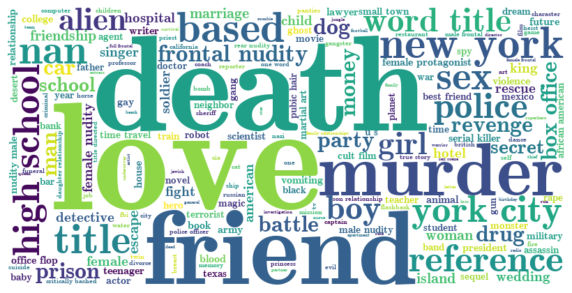

In [18]:
text = '｜'.join(df['plot_keywords'].astype(str)).split('｜')

text = ' '.join(text)

font_path="/Users/gxy/opt/anaconda3/pkgs/matplotlib-base-3.4.3-py39h0a11d32_0/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf"

wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=font_path).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# The themes of movies collected are mainly: love, death, friend, murder...

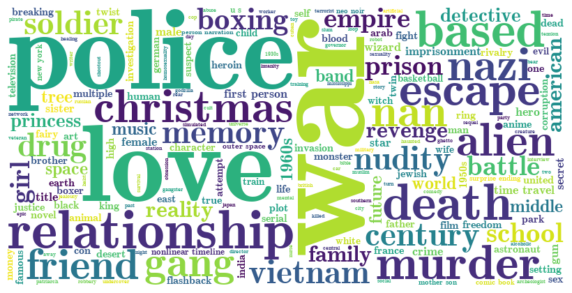

In [20]:
df_filtered = df[df['imdb_score'] > 8]

text = '｜'.join(df_filtered['plot_keywords'].astype(str)).split('｜')

text = ' '.join(text)

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# The themes of movies with ratings greater than 8 are mainly: war, love, police...

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
# Linear Regressio without the feature 'content_rating'.
X = df[['gross', 'budget', 'duration', 'num_user_for_reviews','num_critic_for_reviews', 'title_year']]
y = df['imdb_score']

X_filled = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

Root Mean Squared Error: 0.9392544796015944
Model Coefficients:
gross : -9.234822583119056e-10
budget : -1.5111216263726108e-10
duration : 0.010779547288062009
num_user_for_reviews : 9.253851927614432e-05
num_critic_for_reviews : 0.0033530020819765786
title_year : -0.025598934876146222


In [41]:
# One-Hot Encoding
encoded_df = pd.get_dummies(df['content_rating'], prefix='content_rating')

df_encoded = pd.concat([X, encoded_df], axis=1)

#df_encoded.drop(columns=['content_rating'], inplace=True)

In [42]:
df_encoded

,gross,budget,duration,num_user_for_reviews,num_critic_for_reviews,title_year,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
0,9437933.0,180000.0,85.0,329.0,232.0,2007.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,36000000.0,5000000.0,135.0,69.0,42.0,1953.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,66462600.0,78000000.0,110.0,786.0,202.0,2003.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,128300000.0,19400870.0,135.0,339.0,171.0,1977.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,NaN,3000000.0,80.0,24.0,14.0,2005.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,NaN,8000000.0,106.0,14.0,15.0,2016.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5037,NaN,120000.0,90.0,7.0,12.0,2005.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,NaN,NaN,83.0,25.0,7.0,1940.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5039,10097096.0,4000000.0,93.0,38.0,27.0,2001.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
# Linear Regressio with the feature 'content_rating'.
X_filled = df_encoded.fillna(df_encoded.mean())
y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.3, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("LinearRegression RMSE:", rmse)

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

Root Mean Squared Error: 0.933382431188902
Model Coefficients:
gross : -7.604603783111297e-10
budget : -6.240654023919322e-11
duration : 0.01117827139570642
num_user_for_reviews : 9.69017593863955e-05
num_critic_for_reviews : 0.0036984981917425283
title_year : -0.026983104136863313


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 0.8446302359347359


In [46]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Support Vertor Machine
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print("SVM RMSE:", rmse_svr)

SVR RMSE: 0.8770889589291314


In [47]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print("Decision Tree RMSE:", rmse_tree)

Decision Tree RMSE: 1.1738684533586183


In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Neural Network
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp_model.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_model.predict(X_test_scaled)

rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
print("Neural Network RMSE:", rmse_mlp)

Neural Network RMSE: 0.9177160827687479
